In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
from pyspark.sql.types import *

spark = SparkSession \
    .builder \
    .getOrCreate()

regex_extract(str, pattern, idx) </br>

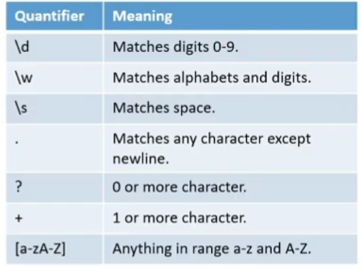

In [36]:
df = spark.createDataFrame(data = [('11124dgsms1 ab',)], schema=['str'])
df.show()

+--------------+
|           str|
+--------------+
|11124dgsms1 ab|
+--------------+



In [43]:
df\
    .withColumn('extract', regexp_extract('str', '(\d+)', 1))\
    .withColumn('extract_all_numbers', regexp_replace('str', "[^0-9]+", ""))\
    .withColumn('all_letters', regexp_replace('str', r"[^a-zA-Z]+", " "))\
    .withColumn('all_letters_no_space', regexp_replace('str', r'[^a-zA-Z]', ''))\
    .withColumn("replace_last_letters",
        when(col('str').endswith('ab'), regexp_replace('str',"ab", "AB")).otherwise('str'))\
    .show()

+--------------+-------+-------------------+-----------+--------------------+--------------------+
|           str|extract|extract_all_numbers|all_letters|all_letters_no_space|replace_last_letters|
+--------------+-------+-------------------+-----------+--------------------+--------------------+
|11124dgsms1 ab|  11124|             111241|   dgsms ab|             dgsmsab|      11124dgsms1 AB|
+--------------+-------+-------------------+-----------+--------------------+--------------------+

